<b>Objective: The dataset used here contains an airline passenger satisfaction survey. The following script predicts passenger satisfaction and evaluates the factors that are highly correlated with a satisfied passenger.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

<b> Data used: [Airline Passenger Satisfaction](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)</b><br>
Source: Kaggle<br>
Predictors: Output of the algorithm after it has been trained on our dataset.<br>
Predictands: "Satisfaction" of the passengers.<br>

<b>Reading data</b>

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
print(train.shape)
print(test.shape)

(103904, 25)
(25976, 25)


In [5]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#test.info()

<b>Cleaning up a little..</b>

In [7]:
unreq_feat=['Unnamed: 0','id']
train=train.drop(unreq_feat,axis=1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
test=test.drop(unreq_feat,axis=1)

In [11]:
#train.iloc[:,0]
#train.loc[:,'Gender']

In [12]:
#train.info()

<b>Visualising data</b>

/Users/meena/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


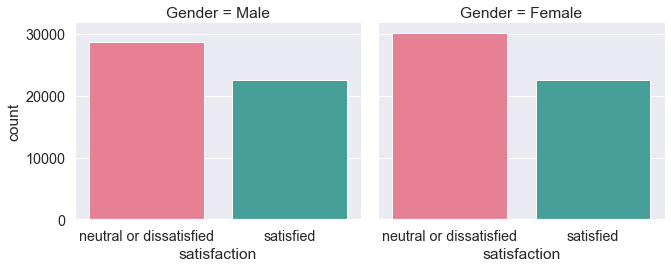

In [13]:
sn.set(font_scale=1.3)
sn.catplot("satisfaction",col="Gender",data=train,kind='count',col_wrap=2, height=4, aspect=1.2,palette="husl")

/Users/meena/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


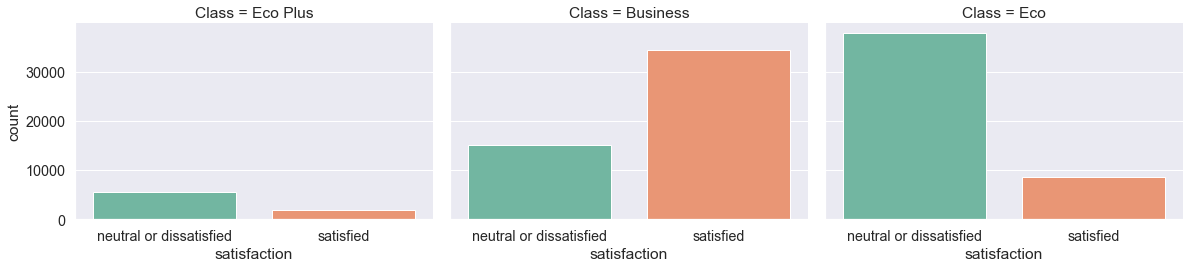

In [14]:
sn.catplot("satisfaction", col="Class", col_wrap=3, data=train, kind="count", height=4, aspect=1.4,palette="Set2")  

/Users/meena/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


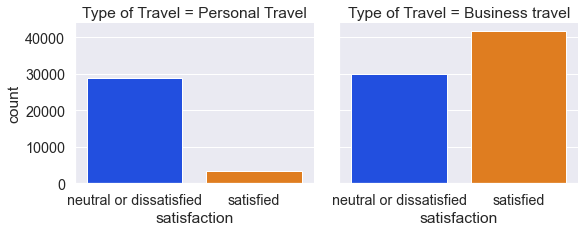

In [15]:
sn.catplot("satisfaction", col="Type of Travel", col_wrap=2, data=train, kind="count", height=3.5, aspect=1.2,palette="bright")  

<b>converting categorical variables into boolean</b>

In [16]:
np.unique(train.loc[:,'satisfaction'])

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [17]:
np.unique(train.loc[:,'Customer Type'])

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [18]:
np.unique(train.loc[:,'Type of Travel'])

array(['Business travel', 'Personal Travel'], dtype=object)

In [19]:
np.unique(train.loc[:,'Class'])

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [20]:
#change 'neutral or dissatisfied' to 0 and 'satisfied' to 1
train.replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace=True)
test.replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace=True)

#change 'Male' to 0 and 'Female' to 1
train.replace({"Male": 0, "Female": 1}, inplace=True)
test.replace({"Male": 0, "Female": 1}, inplace=True)

#change 'Loyal Customer' to 1 and 'disloyal Customer' to 0
train.replace({"disloyal Customer": 0, "Loyal Customer": 1}, inplace=True)
test.replace({"disloyal Customer": 0, "Loyal Customer": 1}, inplace=True)

#change 'Personal Travel' to 0 and 'Business travel' to 1
train.replace({"Personal Travel": 0, "Business travel": 1}, inplace=True)
test.replace({"Personal Travel": 0, "Business travel": 1}, inplace=True)

#change 'Eco' to 0, 'Eco Plus' to 1, and 'Business' to 2
train.replace({"Eco": 0, "Eco Plus": 1, "Business": 2}, inplace=True)
test.replace({"Eco": 0, "Eco Plus": 1, "Business": 2}, inplace=True)

In [21]:
# plt.figure(figsize=(65,35))
# sn.set(font_scale=3.3)
# sn.heatmap(train.corr(),annot=True,fmt='.2g')

<AxesSubplot:>

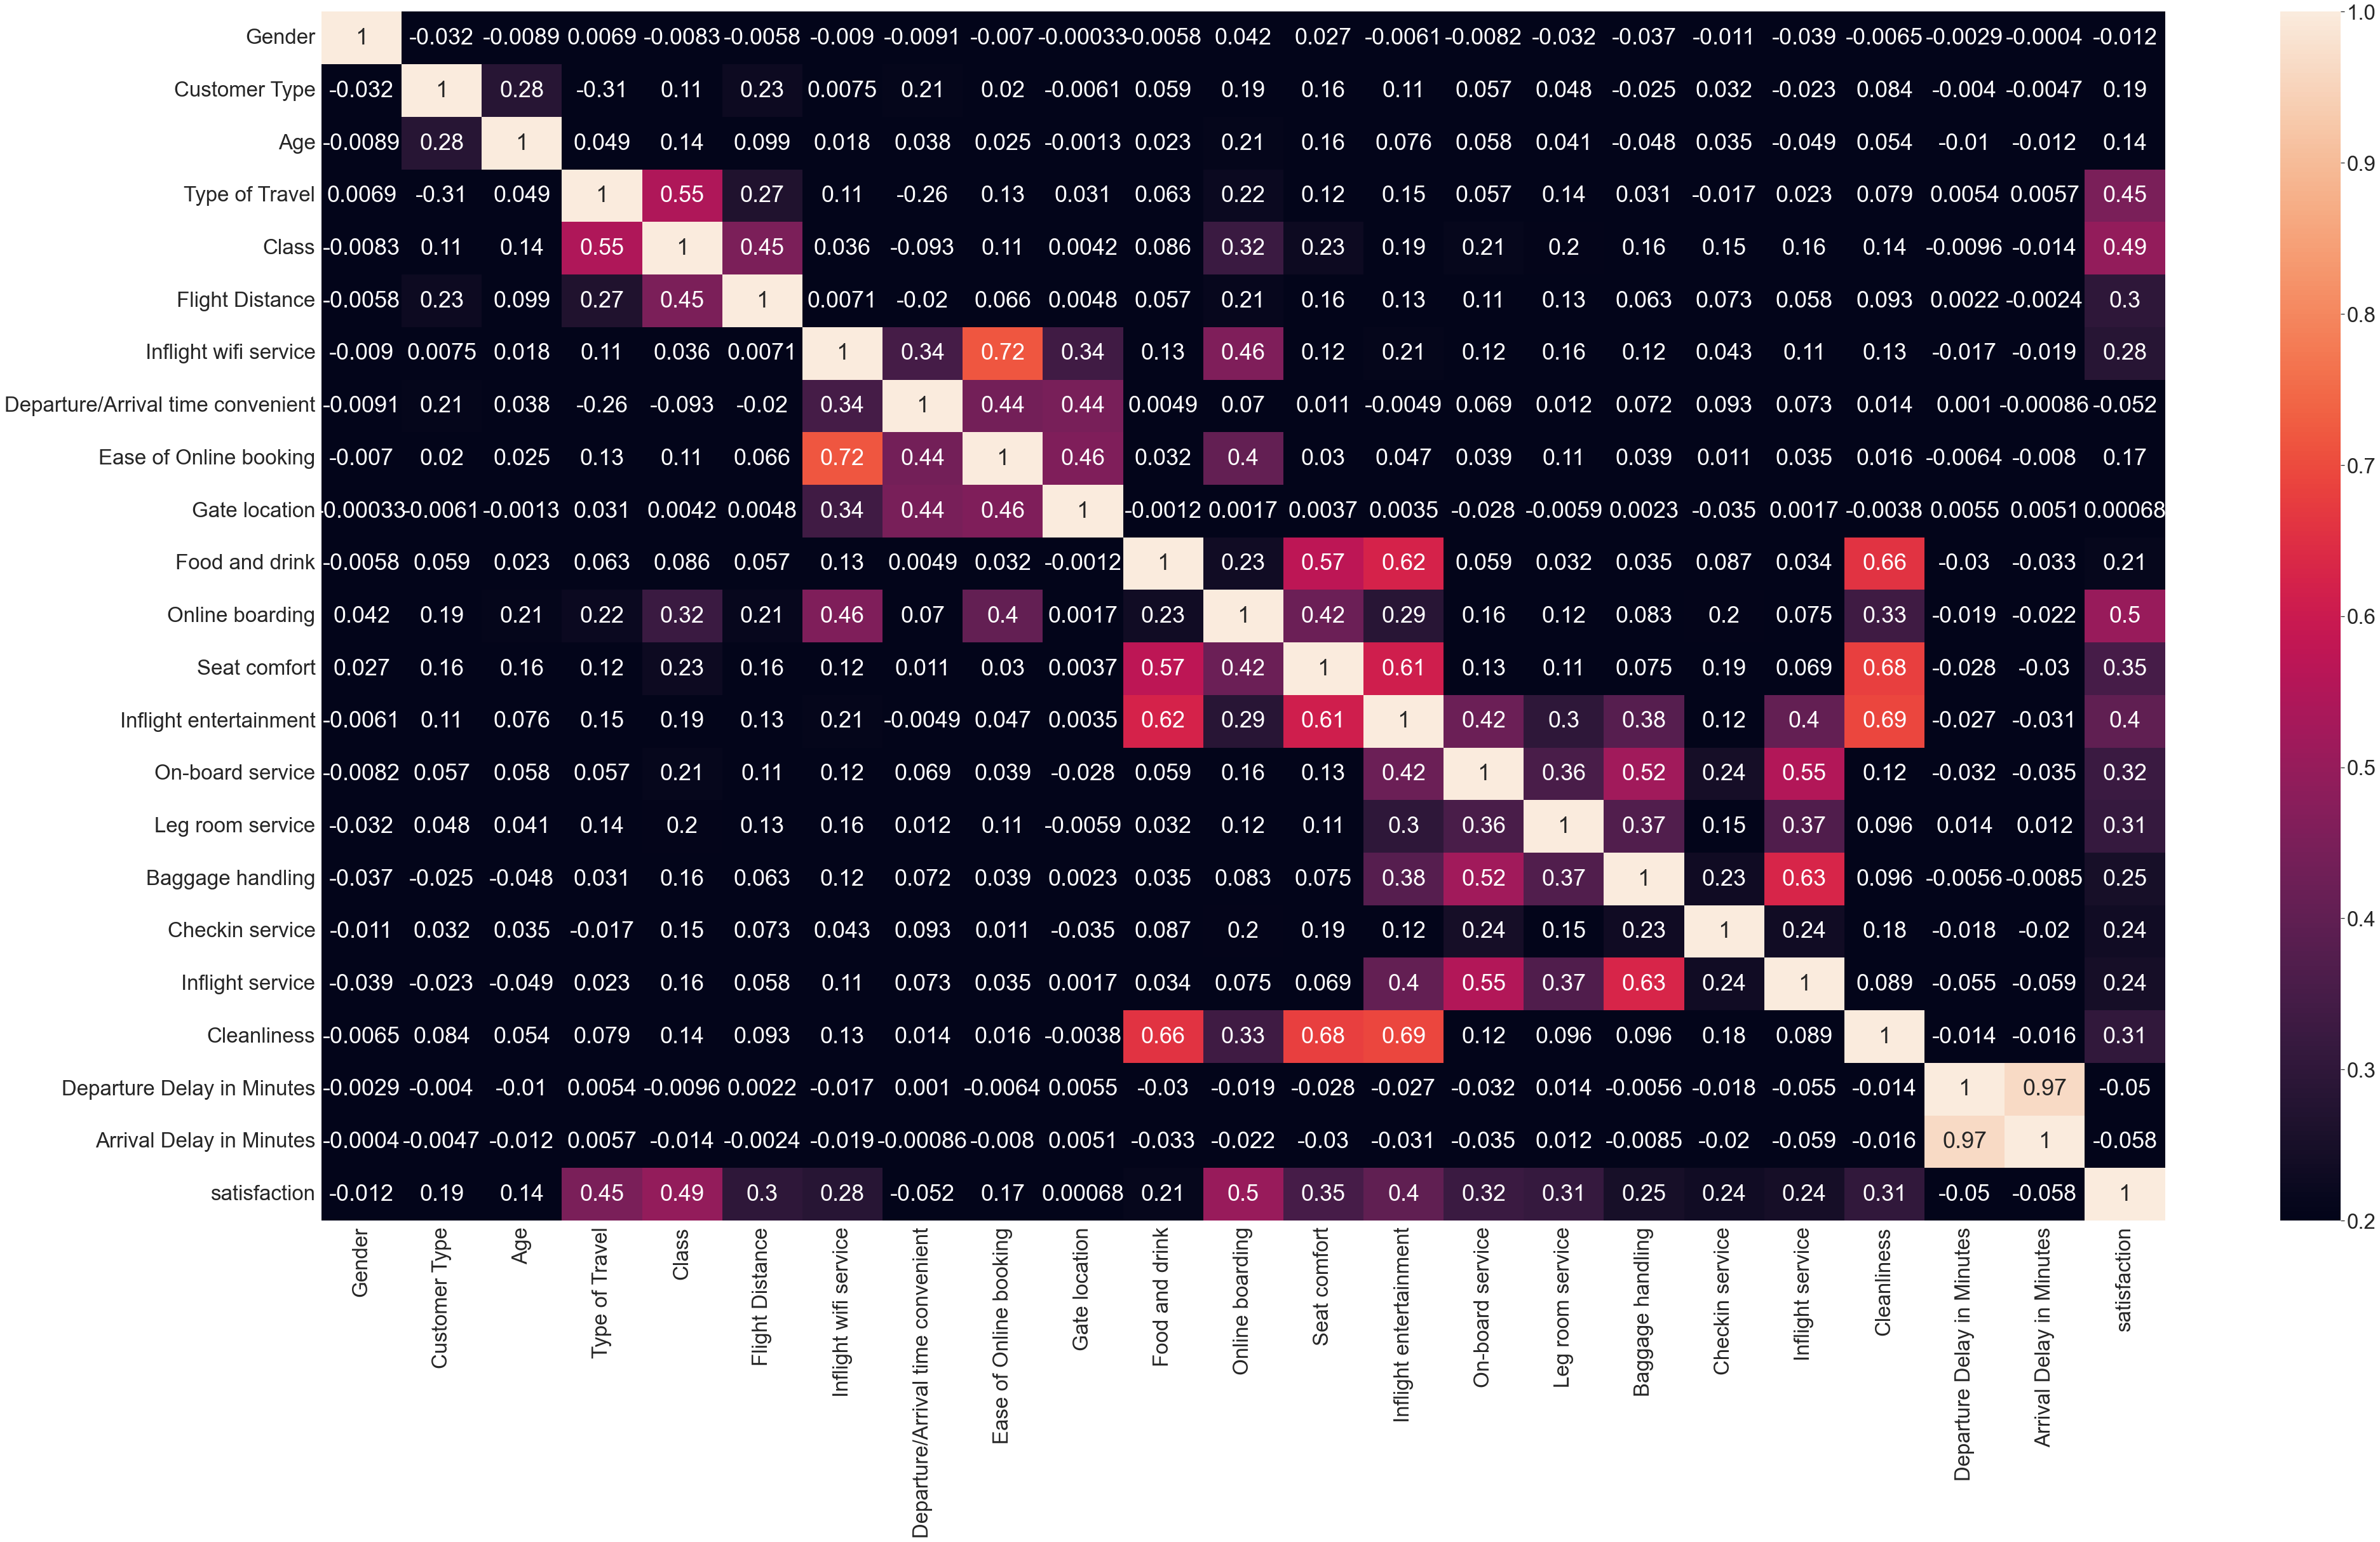

In [23]:
plt.figure(figsize=(65,35))
sn.set(font_scale=3.0)
sn.heatmap(train.corr(),vmin=0.2,annot=True,fmt='.2g')

<b>Factors important for satisfaction seem to be "type of travel", "class", "online boarding", "inflight entertainment", "seat comfort", "on-board service", "legroom service", "cleanliness".</b><br>
<b>Least important variables are "gender", "Departure/Arrival time convenient", "Gate location", "Departure Delay in Minutes".</b><br>
"Arrival Delay in Minutes" has missing values so we shall keep it for now. <br>
Dropping rest of these features..

In [24]:
feat_drop=['Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes']
train=train.drop(feat_drop,axis=1)
test=test.drop(feat_drop,axis=1)

<b>Modeling</b><br>
This is a classification problem since the passengers will either be satisfied or unsatisfied. Classification algorithms that we can use include logistic regression, decision tree, random forest, lightGBM etc.

<b> 1. Logistic Regression</b>

In [25]:
train.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Arrival Delay in Minutes', 'satisfaction'],
      dtype='object')

In [26]:
features=['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']#,'Arrival Delay in Minutes']
target = ['satisfaction']
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [27]:
X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,13,0,1,460,3,3,5,3,5,5,4,3,4,4,5,5
1,0,25,1,2,235,3,3,1,3,1,1,1,5,3,1,4,1
2,1,26,1,2,1142,2,2,5,5,5,5,4,3,4,4,4,5
3,1,25,1,2,562,2,5,2,2,2,2,2,5,3,1,4,2
4,1,61,1,2,214,3,3,4,5,5,3,3,4,4,3,3,3


In [35]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
# scaler.fit_transform(X_train)
# print(scaler.mean_)
# scaler.fit_transform(X_test)
# print(scaler.mean_)

In [70]:
X_train=pd.DataFrame(X_train)
X_train.columns=features

In [71]:
X_train

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.472767,-1.745279,-1.490614,-0.029187,-0.731539,0.203579,0.173776,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870
1,-2.115208,-0.951360,0.670865,1.009393,-0.957184,0.203579,0.173776,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292
2,0.472767,-0.885200,0.670865,1.009393,-0.047584,-0.549533,-0.541060,1.352264,1.296496,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870
3,0.472767,-0.951360,0.670865,1.009393,-0.629246,-0.549533,1.603448,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251
4,0.472767,1.430397,0.670865,1.009393,-0.978244,0.203579,0.173776,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-2.115208,-1.083680,0.670865,-1.067767,-1.000307,-0.549533,-0.541060,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251
103900,0.472767,0.636478,0.670865,1.009393,1.160869,0.956691,0.888612,-0.904178,0.555482,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829
103901,-2.115208,-0.620561,0.670865,1.009393,0.807860,-1.302646,-1.255895,0.600117,-1.667559,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829
103902,-2.115208,-1.149840,0.670865,-1.067767,-0.189991,-1.302646,-1.255895,-1.656326,-1.667559,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292


In [38]:
from sklearn.linear_model import LogisticRegression
Lmodel=LogisticRegression(max_iter=100,verbose=0).fit(X_train,y_train.ravel())
y_pred=Lmodel.predict(X_test)

In [39]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8697643979057592

In [41]:
# predict probabilities
lr_probs = Lmodel.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.923


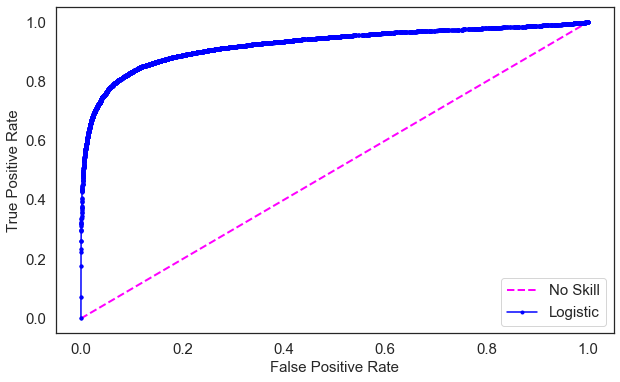

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10,6))
sn.set(font_scale=2.0)
sn.set_theme(style="white", palette=None)

# generate a no skill prediction (majority class)
ns_probs = np.zeros(len(y_test))

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='magenta', label='No Skill', lw=2.0)
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# show the legend
plt.legend(fontsize=15)
plt.grid(False)
# show the plot
plt.show()

<b> 2. Random Forest</b>

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=20,criterion="gini").fit(X_train,y_train.ravel())
y_pred_RF = model_RF.predict(X_test)
metrics.accuracy_score(y_test,y_pred_RF)

0.9595780720665229

<b>96% accuracy</b><br>
Model gives good results.